In [1]:
import numpy as np
import pandas as pd
import random
from time import sleep
from IPython import display
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# Q1A

In [2]:
unit_step = lambda x,theta: 0 if x < theta else 1

def Perceptron(data,ini_weight,theta=0):
    errors=[1]*len(data)
    w = ini_weight
    iteration = 1
    while any(v == 1 for v in errors[-len(data):]):
        #print('iteration #',iteration)
        for rows in data.iterrows():
            x = rows[1][:-1]
            expected = rows[1][-1]
            result = np.dot(w,x)
            error = expected - unit_step(result,theta)
            #print('(',expected,unit_step(result,theta),error,')',end=',')
            errors.append(error)
            w += error * x
        if iteration >= 20:
            print('not fully trained')
            break
        iteration += 1
    predicted_label = np.zeros(len(data))    
    predicted = data.ix[:,:-1].values.dot(w)
    predicted_label[predicted<theta]=0
    predicted_label[predicted>theta]=1
    
    return w,predicted_label

# Discussion Q1A

<br />Psuedo code of perceptron:
    
    Random pick an initial weight vector that matches 2nd dimension of the training data (features)
    for every instance of the training data:
    1. dot product (instance and initial weight vector)
    2. if the dot product > threshold (theta)
    output 1
    3. if the dot product < threshold (theta)
    output 0
    4. error is the difference between true label and output
    update the weight vector by adding product(error and instance) - if there is no error for this instance, there should not be any update, otherwise, update depends on the error. 
    5. repeat 1 - 4 until there is no error occurs - that is why I have the iteration and max iteration for this assignment is 20. 

# Q1B-C

True weight [-1.28199904 -0.72126155]


(-1.1, 1.1)

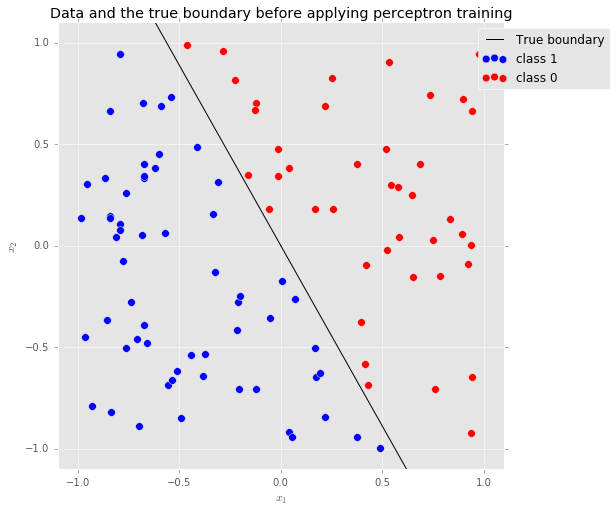

In [3]:
n = 2
m = 100
data = np.random.uniform(-1,1,(n,m))
TrueWeight = np.random.randn(n)
print('True weight',TrueWeight)
weightSum = np.dot(data.T,TrueWeight)
weightSum_mid = np.median(weightSum)
label = np.zeros(len(weightSum))
label[weightSum<0]=0
label[weightSum>0]=1
data = data.T
data = pd.DataFrame(data)
data.columns=['0','1']
data['label']=label

plt.figure(figsize=(8,8))
cond=data['label']==1
subset_a = data[cond].dropna()
subset_b = data[~cond].dropna()
plt.scatter('0','1',data=subset_a,s=60,c='b',label='class 1')
plt.scatter('0','1',data=subset_b,s=60,c='r',label='class 0')
plt.plot([0,1],[0,-TrueWeight[0]/TrueWeight[1]],'k',label='True boundary')
plt.plot([0,-1],[0,TrueWeight[0]/TrueWeight[1]],'k')
plt.xlabel('$x_1$');plt.ylabel('$x_2$');plt.title('Data and the true boundary before applying perceptron training')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

# Disscussion Q1B-C
<br />n = 2 means there are 2 features in the training set. m = 100 means there are 100 instances in the training set. 
<br />Random points are sampled from uniform distribution between -1 and 1, so that after the transformed by the true weight, the classification point is zero. This also means that the threshold ($\theta$) is zero. 

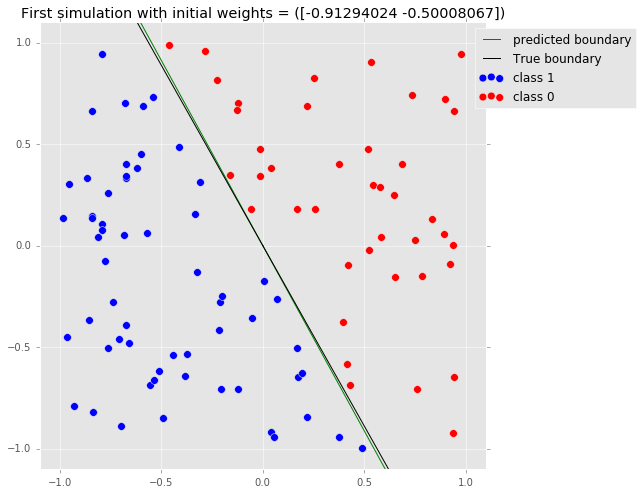

In [4]:
ini_weight=np.random.randn(2)
w,predicted_label = Perceptron(data,ini_weight)

plt.figure(figsize=(8,8))
cond=data['label']==1
subset_a = data[cond].dropna()
subset_b = data[~cond].dropna()
plt.scatter('0','1',data=subset_a,s=60,c='b',label='class 1')
plt.scatter('0','1',data=subset_b,s=60,c='r',label='class 0')
plt.plot([0,1],[0,-w[0]/w[1]],'g',label='predicted boundary')
plt.plot([0,-1],[0,w[0]/w[1]],'g')
plt.plot([0,1],[0,-TrueWeight[0]/TrueWeight[1]],'k',label='True boundary')
plt.plot([0,-1],[0,TrueWeight[0]/TrueWeight[1]],'k')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.title('First simulation with initial weights = ({})'.format(ini_weight))

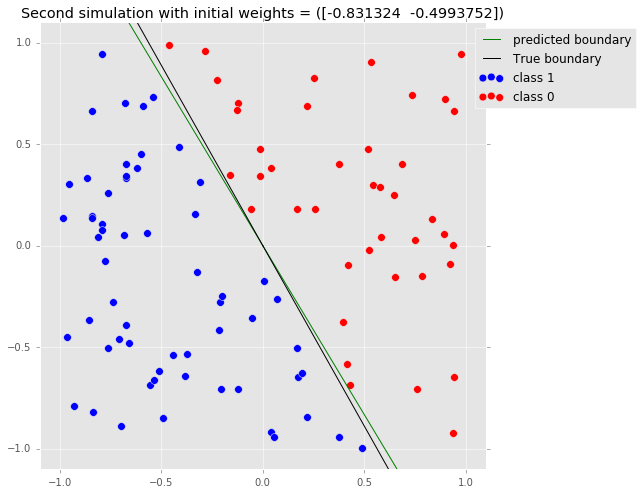

In [5]:
ini_weight=np.random.randn(2)
w,predicted_label = Perceptron(data,ini_weight)

plt.figure(figsize=(8,8))
cond=data['label']==1
subset_a = data[cond].dropna()
subset_b = data[~cond].dropna()
plt.scatter('0','1',data=subset_a,s=60,c='b',label='class 1')
plt.scatter('0','1',data=subset_b,s=60,c='r',label='class 0')
plt.plot([0,1],[0,-w[0]/w[1]],'g',label='predicted boundary')
plt.plot([0,-1],[0,w[0]/w[1]],'g')
plt.plot([0,1],[0,-TrueWeight[0]/TrueWeight[1]],'k',label='True boundary')
plt.plot([0,-1],[0,TrueWeight[0]/TrueWeight[1]],'k')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.title('Second simulation with initial weights = ({})'.format(ini_weight))

# Discussion of first simulation
<br />After picking a random initial weight (as a guess of the true weight), perceptron is applied. If the gap between blue dots and red dots is large enough, theoretically, there could be several weights that could classify blue and red well. If the gap is too close, there could be one optimal weight that classify blue and red well, and it might take lots of iterations of going through the data to find the "optimal". 

# Q1D

# Function perceptron_plot is to plot the change the weight after each instance of the training data.

In [6]:
def Perceptron_plot(data,ini_weight,theta=0):
    errors=[1]*len(data)
    w = ini_weight
    iteration = 1
    plt.figure(figsize=(8,8))
    cond=data['label']==1
    subset_a = data[cond].dropna()
    subset_b = data[~cond].dropna()
    plt.scatter('0','1',data=subset_a,s=60,c='b',label='class 1')
    plt.scatter('0','1',data=subset_b,s=60,c='r',label='class 0')
    while any(v == 1 for v in errors[-len(data):]):
        print('iteration #',iteration)
        for rows in data.iterrows():
            x = rows[1][:-1]
            expected = rows[1][-1]
            result = np.dot(w,x)
            error = expected - unit_step(result,theta)
            print('(',expected,unit_step(result,theta),error,')',end=',')
            errors.append(error)
            w += error * x
            # start of the motion figure
            plt.xlim([-1.1,1.1])
            plt.ylim([-1.1,1.1])
            line1=plt.plot([0,1],[0,-w[0]/w[1]],'g',label='predicted boundary')
            line2=plt.plot([0,-1],[0,w[0]/w[1]],'g')
            display.clear_output(wait=True)
            display.display(plt.gcf())
            sleep(0.02)
            line1.pop(0).remove()
            line2.pop(0).remove()
            plt.xlim([-1.1,1.1])
            plt.ylim([-1.1,1.1])
            # end of motion figure
        if iteration >= 20:
            print('not fully trained')
            plt.title('Plot each iteration')
            break
        iteration += 1
    predicted_label = np.zeros(len(data))    
    predicted = data.ix[:,:-1].values.dot(w)
    predicted_label[predicted<theta]=0
    predicted_label[predicted>theta]=1
    return w,predicted_label

iteration # 1
iteration # 2
iteration # 3


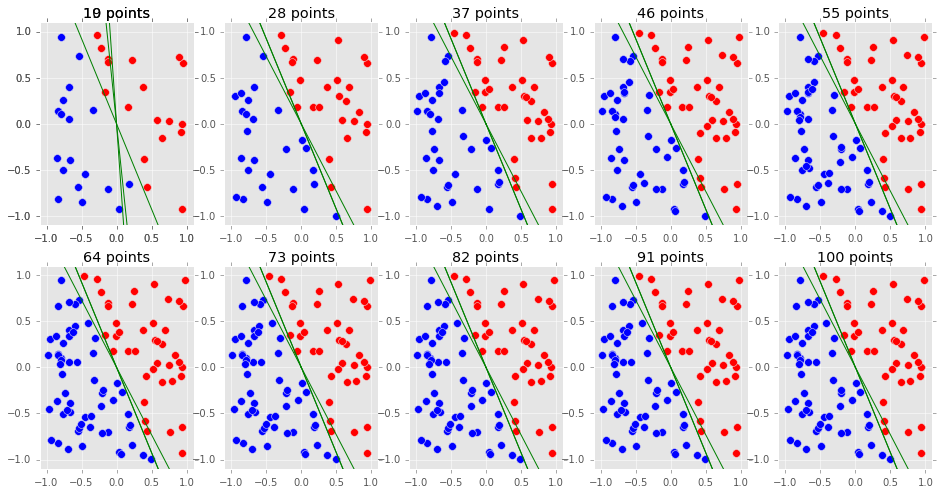

In [8]:
def Perceptron_plot_demonstrate(data,ini_weight,theta=0):
    errors=[1]*len(data)
    w = ini_weight
    iteration = 1
    fig=plt.figure(figsize=(16,8))
    
    while any(v == 1 for v in errors[-len(data):]):
        print('iteration #',iteration)
        cnt = 1
        idx = 0
        for rows in data.iterrows():
            x = rows[1][:-1]
            expected = rows[1][-1]
            result = np.dot(w,x)
            error = expected - unit_step(result,theta)
            errors.append(error)
            w += error * x
            idx += 1
            # start of the motion figure
            cnt += 1
            if cnt == 10:
                cnt = 1
                ax = fig.add_subplot(2,5,(idx+1)/10)
                cond=data['label']==1
                subset_a = data[cond].dropna()
                subset_b = data[~cond].dropna()
                ax.scatter('0','1',data=subset_a[:idx],s=60,c='b',label='class 1')
                ax.scatter('0','1',data=subset_b[:idx],s=60,c='r',label='class 0')
                plt.xlim([-1.1,1.1])
                plt.ylim([-1.1,1.1])
                ax.plot([0,1],[0,-w[0]/w[1]],'g',label='predicted boundary')
                ax.plot([0,-1],[0,w[0]/w[1]],'g')
                plt.title('%d points'% (idx+1))
            
            # end of motion figure
        if iteration >= 20:
            print('not fully trained')
            plt.title('Plot each iteration')
            break
        iteration += 1
    predicted_label = np.zeros(len(data))    
    predicted = data.ix[:,:-1].values.dot(w)
    predicted_label[predicted<theta]=0
    predicted_label[predicted>theta]=1
    return w,predicted_label
ini_weight=np.random.randn(2)
w,predicted_label = Perceptron_plot_demonstrate(data,ini_weight)

Function perceptron_plot_demonstrate is to show the plot of weight after every several instances of the training data. If there are multiple lines on a figure, that means the training passes more than 1 iteration through the entire data set. The reason there could multiple iterations is because after 1 iteration pass through the entire data set, there exist some error in the prediction. Going through the data several more times could reduce the errors and finally converge to zero. If after 20 iterations and the program cannot converge to zero error, the program would stop and the final updated weight is the best fit weight vector for estimating the true weight vector. 

# Q2A

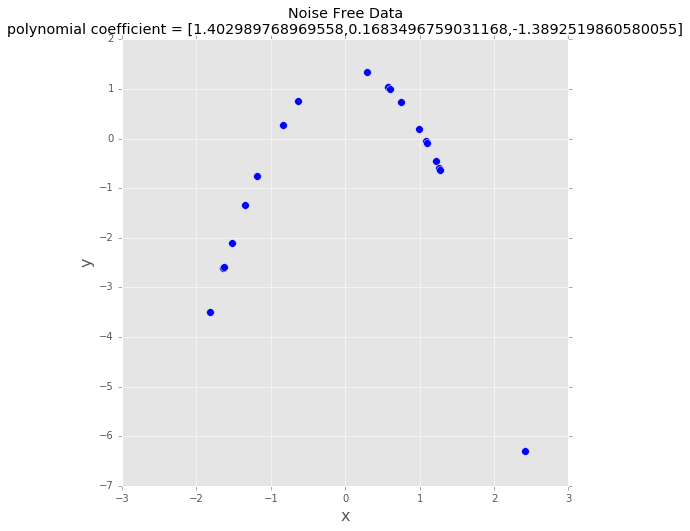

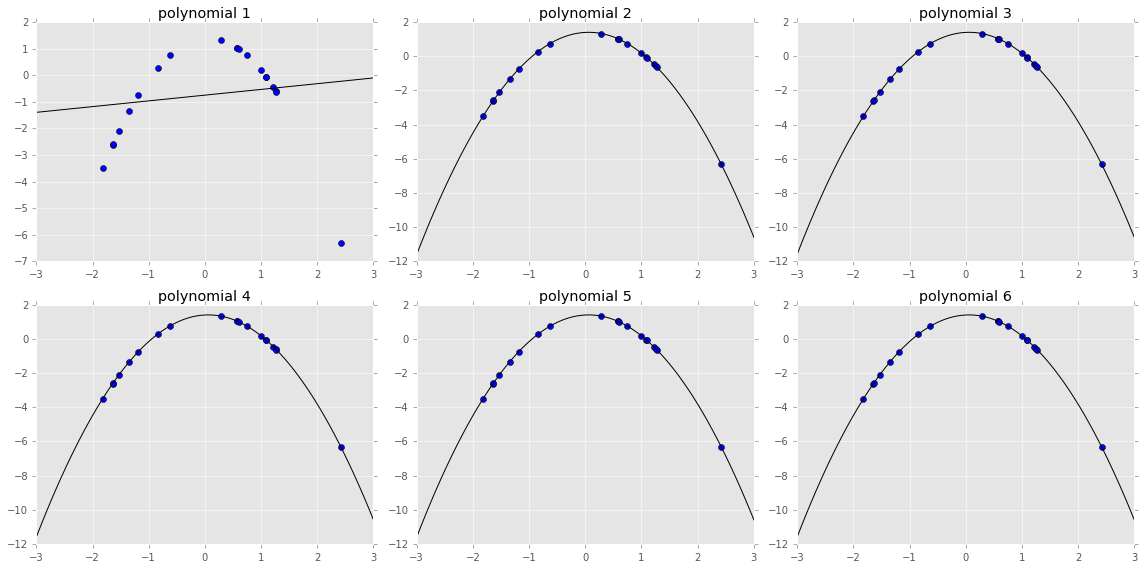

In [9]:
weight = np.random.normal(0,1,size=(3))
x = np.random.randn(20)
x = np.sort(x)
y = np.zeros(x.shape)
for ii,values in enumerate(x):
    y[ii] = weight[0] + weight[1] * values + weight[2] * values**2 

plt.figure(figsize=(8,8))
plt.scatter(x,y,s=60,c='blue')
plt.title('Noise Free Data\npolynomial coefficient = [{w[0]},{w[1]},{w[2]}]'.format(w=weight))
plt.xlabel('x',fontsize=16);plt.ylabel('y',fontsize=16)

fig = plt.figure(figsize=(16,8))
xx = np.linspace(-3,3,100)
for ii in range(6):
    p = np.polyfit(x,y,ii+1)
    ax = fig.add_subplot(2,3,ii+1)
    pline = np.poly1d(p)
    ax.plot(x,y,'bo',xx,pline(xx),'k')
    plt.title('polynomial %d' % (ii + 1))
    plt.tight_layout()

# Discussion 2A
<br />When the data is generated by 2nd polynomial with no noise added, it is clear that any polynomial that is greater than 2 could be the best fit for the data. 

# Q2B

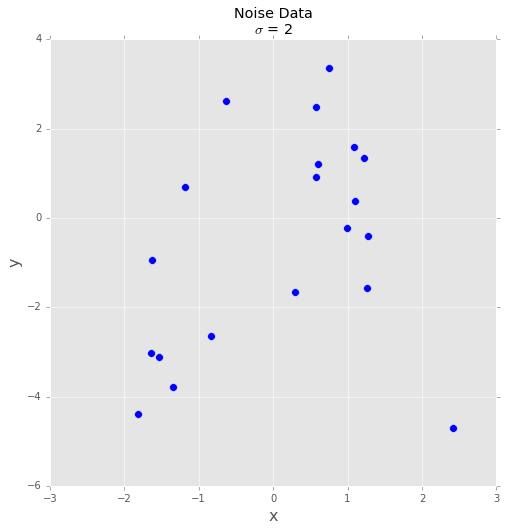

In [10]:
s = 2
y = np.zeros(x.shape)
for ii,values in enumerate(x):
    y[ii] = weight[0] + weight[1] * values + weight[2] * values**2 + np.random.normal(0,s,1)

plt.figure(figsize=(8,8))
plt.scatter(x,y,s=60,c='blue')
plt.title('Noise Data\n$\sigma$ = {}'.format(s));plt.xlabel('x',fontsize=16);plt.ylabel('y',fontsize=16)

# Discussion Q2B
<br />Adding Gaussian noise to data in question 2 A, try to make it less obvious that data is from polynomial 2. 

# Q2C

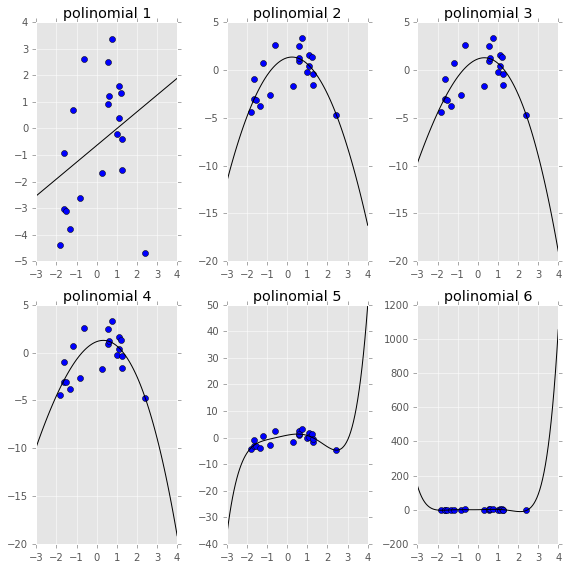

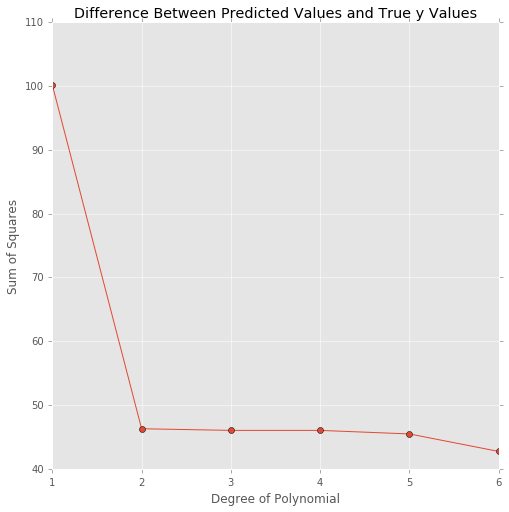

In [11]:
fig = plt.figure(figsize=(8,8))
xx = np.linspace(-3,4,100)
error=[]
for ii in range(6):
    p = np.polyfit(x,y,ii+1)
    ax = fig.add_subplot(2,3,ii+1)
    pline = np.poly1d(p)
    fittingValue = pline(x)
    error.append(sum((fittingValue - y)**2))
    ax.plot(x,y,'bo',xx,pline(xx),'k')
    plt.title('polinomial %d' % (ii + 1))
    plt.tight_layout()
fig = plt.figure(figsize=(8,8))
plt.plot([1,2,3,4,5,6],error,'o-')
plt.title('Difference Between Predicted Values and True y Values')
plt.xlabel('Degree of Polynomial');plt.ylabel('Sum of Squares')

# Discussion Q2C
<br />Besed on the second figure above, when the validation data is the same as the training data, the fitting error decreases af a function of polynomial increases. This is because the higher polynomial fits the data better. When we use the same data to test how good the fitting is, it must be decreasing as the polynomial increases. 

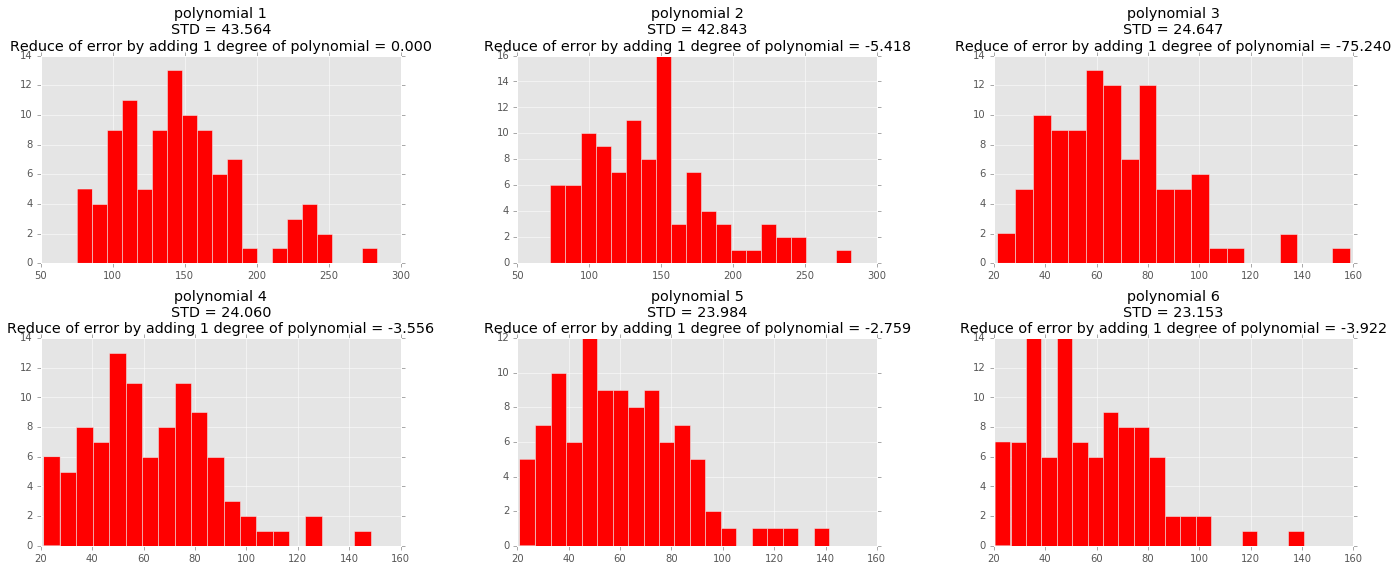

In [17]:
n = 100
Errors=[]
for iii in range(n):
    y = np.zeros(x.shape)
    for ii,values in enumerate(x):
        y[ii] = weight[0] + weight[1] * values + weight[2] * values**2 + np.random.normal(0,s,1)
    error=[]
    for ii in range(6):
        p = np.polyfit(x,y,ii)
        pline = np.poly1d(p)
        fittingValue = pline(x)
        error.append(sum((fittingValue - y)**2))
    Errors.append(error)

fig=plt.figure(figsize=(20,8))
for ii in range(6):
    ax=fig.add_subplot(2,3,ii+1)
    ax.hist(np.array(Errors)[:,ii],bins=20,color='red')
    StandardDeviation = np.array(Errors)[:,ii].std()
    delta = np.diff(np.array(Errors).mean(axis=0))
    delta = np.append([0],delta)
    plt.title('polynomial %d\nSTD = %.3f\nReduce of error by adding 1 degree of polynomial = %.3f' % (ii + 1,StandardDeviation,delta[ii]))
plt.tight_layout()

# Discussion Q2C
<br />Error is the sum of square of the difference between each data point and its prediction by the polynomial fitting. 
<br />We can observe from above that the standard deviation of the distribution of the error decreases as the degree of polynomial increases. Also, the mean of the distribution decreases as the degree of plolynomial increases. If we look at each simulation, polynomial 6 always has the least error, but from the one time simulation graphs (2 by 3 subplots) we should know that higher polynomial fitting tends to overfit the data, thus, they have the least error if the validation data and training data are the same. 
<br />In fact, based on the most change of error by adding one degree of polynomial, polynomial 3 is the best fit for the data.

# Q2D

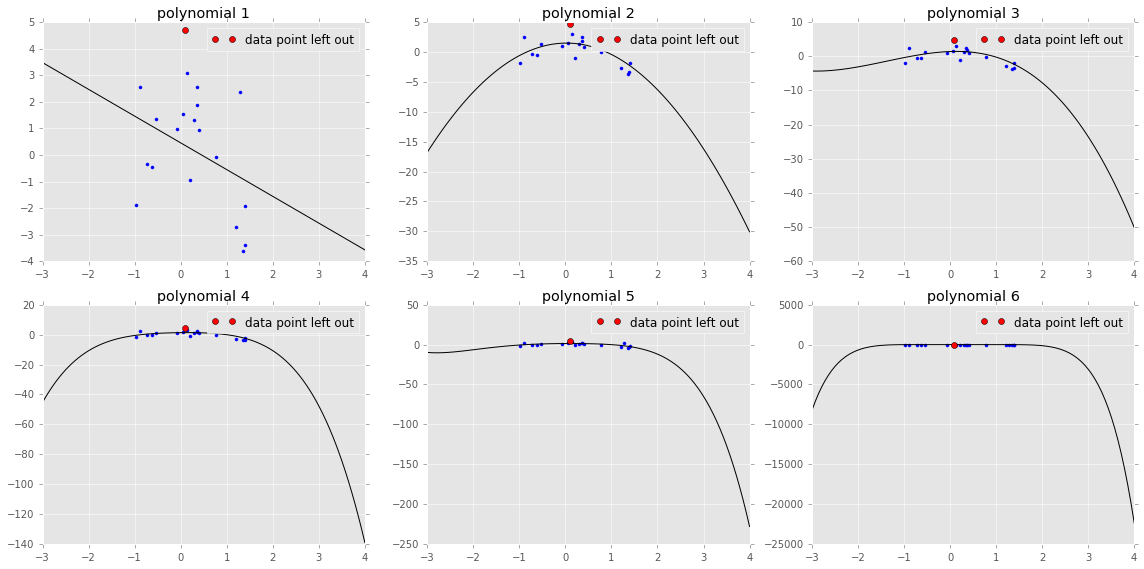

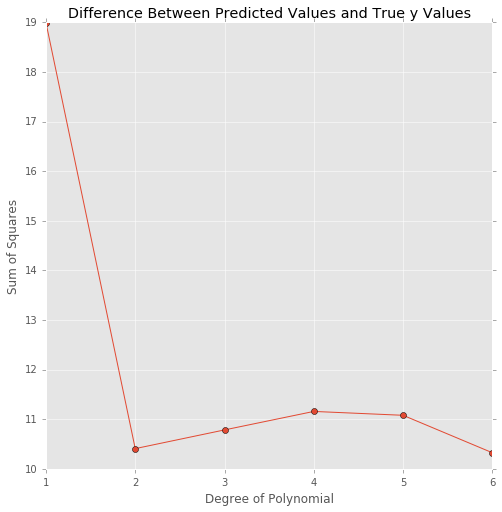

In [20]:
x = np.random.randn(20)
x = np.sort(x)
y = np.zeros(x.shape)
for ii,values in enumerate(x):
    y[ii] = weight[0] + weight[1] * values + weight[2] * values**2 + np.random.normal(0,s,1)

fig = plt.figure(figsize=(16,8))
perm = np.append(np.ones(len(x)-1),[0])
permutation = np.random.choice(perm,len(perm),replace=False) == 1
picks = np.array(list(zip(x,y)))[permutation]
x_permutation = picks[:,0]
y_permutation = picks[:,1]
leaveOut = np.array(list(zip(x,y)))[~permutation]
x_leave = leaveOut[:,0]
y_leave = leaveOut[:,1]
error=[]
for ii in range(6):
    ax = fig.add_subplot(2,3,ii+1)
    p = np.polyfit(x_permutation,y_permutation,ii+1)
    fittingFunction = np.poly1d(p)
    fittingValue = fittingFunction(x_leave)
    error.append(sum((fittingValue - y_leave)**2))
    ax.plot(x_permutation,y_permutation,'b.',xx,fittingFunction(xx),'k')
    ax.plot(x_leave,y_leave,'ro',label='data point left out')
    plt.legend()
    plt.title('polynomial %d' % (ii + 1))
    plt.tight_layout()
fig = plt.figure(figsize=(8,8))
plt.plot([1,2,3,4,5,6],error,'o-')
plt.title('Difference Between Predicted Values and True y Values')
plt.xlabel('Degree of Polynomial');plt.ylabel('Sum of Squares')

# Discussion Q2D
<br />For just one simulation using leave-One-Out-Cross-Validation, there are two things are changing along the simulation: 1) point that is left out, 2) noise that is added to the data. The corresponding y is generated by using the same 2nd coefficient from Q2A. 
<br />In one simulation, if the one data point happend to be close to one of the polynomial fitting, that particular polynomial fitting is picked as the best fit. But some times it not the best case.
<br />One simulation aparently cannot tell much, because I simulate it several times, and the fitting evaluation change rapidly.

<Container object of 6 artists>

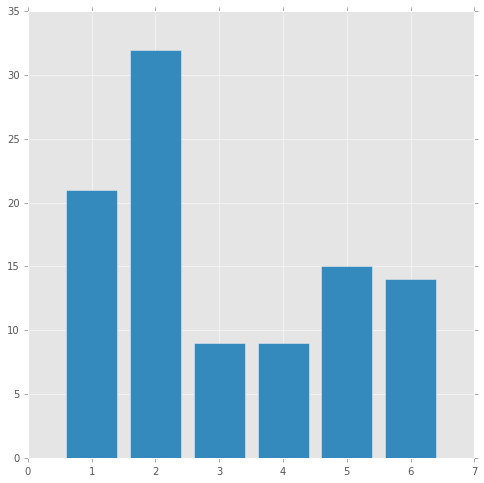

In [45]:
n = 100
Errors=[]
x = np.random.randn(20)
x = np.sort(x)
for iii in range(n):
    y = np.zeros(x.shape)
    for ii,values in enumerate(x):
        y[ii] = weight[0] + weight[1] * values + weight[2] * values**2 + np.random.normal(0,s,1)
    perm = np.append(np.ones(len(x)-1),[0])
    permutation = np.random.choice(perm,len(perm),replace=False) == 1
    picks = np.array(list(zip(x,y)))[permutation]
    x_permutation = picks[:,0]
    y_permutation = picks[:,1]
    leaveOut = np.array(list(zip(x,y)))[~permutation]
    x_leave = leaveOut[:,0]
    y_leave = leaveOut[:,1]
    error=[]
    for ii in range(6):
        p = np.polyfit(x_permutation,y_permutation,ii+1)
        fittingFunction = np.poly1d(p)
        fittingValue = fittingFunction(x_leave)
        error.append(sum((fittingValue - y_leave)**2))
    Errors.append(error)
plt.figure(figsize=(8,8))
hist,bin_edges = np.histogram(np.argmin(np.array(Errors),axis=1))
plt.bar(np.array([1,2,3,4,5,6])-0.4,hist[np.nonzero(hist)],0.8)

# Discussion Q2D
<br />Surprised to me, polynomial 1 (linear regression) and 2nd polynomial are competitive to be the best fittings for 100 simulations. Changing the $\sigma$ of the noise adding to the data, sometimes the linear regression fit could be way more plausible than 2nd polynomial fitting. 
<br />I hypothesize this happen because for small sample size, linear regression resists the noise and provides stable fitting results. The reason that 2nd polynomial is not the best choice is because the noise I add to the data and make data locate at the curve spread out to be uniformly locate around a straight line. 